## Лабораторная работа №2
### Вариант: 17
### Выполнил: Попов Александр

In [226]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import interp 
from sklearn.grid_search import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import StratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import (auc, roc_curve, 
precision_recall_curve, 
average_precision_score) 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn import svm 
from sklearn.preprocessing import label_binarize 
from sklearn.preprocessing import StandardScaler

In [227]:
df=pd.read_csv(r'E://4_iris/iris.data.txt', sep=',',names=('SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'))
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [228]:
df.shape

(150, 5)

In [12]:
df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в набооре данных (включить полученные описания в отчет)

|Переменная|Описание|Парметры(Ключи)|
|----------|--------|---------------|
|SepalLengthCm|Длина чашелистника в см|Любой числовой|
|SepalWidthCm|Ширина чашелистника в см|Любой числовой|
|PetalLengthCm|Длина лепестка в см|Любой числовой|
|PetalWidthCm|Ширина лепестка в см|Любой числовой|
|Species|Вид|1. Iris serosa 2. Iris Versicolour 3.Iris Virginica|

## 2. Удалить дубликаты строк в наборе данных

In [229]:
df=df.drop_duplicates()
df.shape

(147, 5)

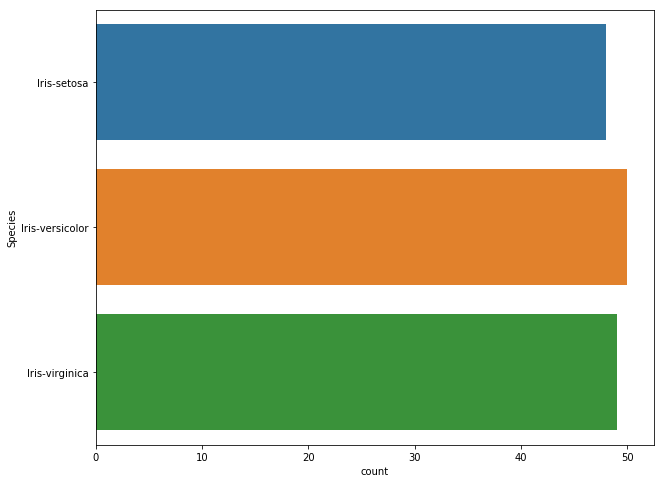

In [105]:
sns.countplot(data=df,y='Species')
plt.show()

Существенного дисбаланска классов не наблюдается, следовательно можем использовать ROC-кривую

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [230]:
num_columns=[i for i in df.columns if df[i].dtype.name!='object']
categ_columns=[i for i in df.columns if df[i].dtype.name=='object']

print('Числовые признаки:',num_columns)
print('Количественные признаки: ',categ_columns)

Числовые признаки: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Количественные признаки:  ['Species']


### Построение диаграммы BoxPlot для признаков до масштабирования:

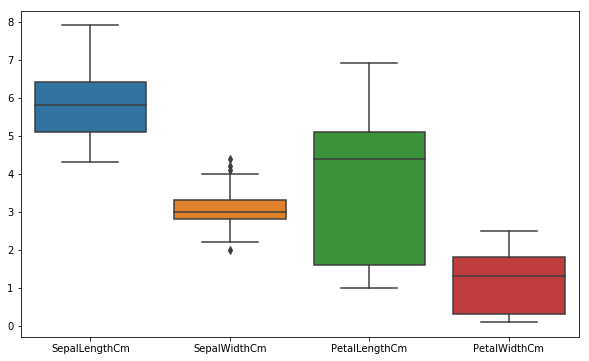

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_columns])
plt.show()

В качестве способа масштабирования выберем метод нормализации

In [231]:
scaler=MinMaxScaler()
df[num_columns]=scaler.fit_transform(df[num_columns])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


### Построение диаграммы BoxPlot для признаков после масштабирования:

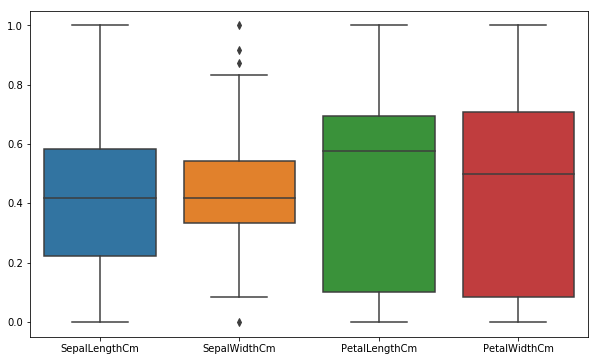

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_columns])
plt.show()

## 5. Выполните замену категориальных признаков

In [232]:
lbEn=LabelEncoder()
df['Species']=lbEn.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


## 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

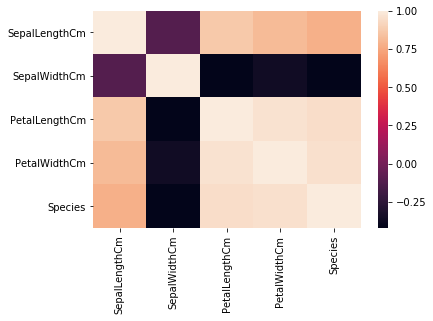

In [112]:
df_corr=df.corr()
sns.heatmap(df_corr)
plt.show()

## 7. Заполните пропущенные значения в данных

Пропущеных значений нет

## 8. Решите поставленную задачи в соответствии с заданием.

In [234]:
#Разделение данных на данные для обучения и тестирования
X=np.array(df.drop('Species',axis=1))
Y=np.array(df['Species'])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=123)

Поиск оптимального радиуса для классификатора: K ближайших соседей

In [235]:
knc=KNeighborsClassifier()
params={'n_neighbors':list(range(1,25))}
knc_grid=GridSearchCV(knc,params)
knc_grid.fit(X_train,Y_train)
best_num=knc_grid.best_estimator_.n_neighbors
best_score=knc_grid.best_score_

print('best train score: ', best_score,'\nat neighbors num:',best_num)


best train score:  0.9863013698630136 
at neighbors num: 3


In [236]:
knc=KNeighborsClassifier(n_neighbors=best_num)
knc.fit(X_train,Y_train)
best_score2=np.mean(Y_test==knc.predict(X_test))
print('test score: ', best_score2)

test score:  0.945945945946


Линейный классификатор (Персептрон):

In [237]:
perc=sk.linear_model.Perceptron()
params={'estimator__alpha': np.linspace(0,1,50)[1:],
        'estimator__n_iter':[int(50)]
}
paramsearch=GridSearchCV(estimator=perc,param_grid=dict(alpha=np.linspace(0,1,50)[1:],max_iter=[(x+1)*10 for x in range(5)]))
paramsearch.fit(X_train,Y_train)
best_score=paramsearch.best_score_
selected_alpha=paramsearch.best_estimator_.alpha
best_max_iter=paramsearch.best_estimator_.max_iter
print('best_score: ',best_score,'at alpha: ',selected_alpha)



best_score:  0.7808219178082192 at alpha:  0.0204081632653


In [238]:
perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train)
test_score=np.mean(Y_test==perc.predict(X_test))
print('test score: ',test_score)


test score:  0.905405405405


In [239]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

Y_test_binar=label_binarize(Y_test, classes=[0, 1, 2])
Y_train_binar=label_binarize(Y_train, classes=[0, 1, 2])

clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train)
probas_perc=clbc.predict_proba(X_test)


Построение ROC-кривых:

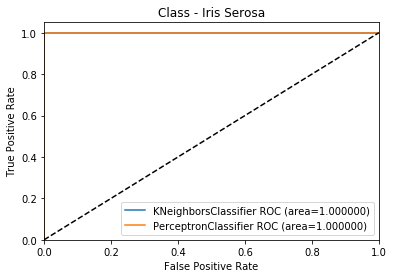

In [218]:
plt.figure()
knc1=KNeighborsClassifier(n_neighbors=best_num)
probas_knc1=knc1.fit(X_train,Y_train_binar[:,0]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,0],probas_knc1[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,0])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,0])
probas_perc1=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,0],probas_perc1[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Serosa')
plt.show()

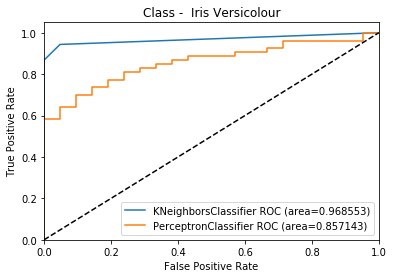

In [219]:
plt.figure()
knc2=KNeighborsClassifier(n_neighbors=best_num)
probas_knc2=knc2.fit(X_train,Y_train_binar[:,1]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,1],probas_knc2[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,1])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,1])
probas_perc2=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,1],probas_perc2[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class -  Iris Versicolour')
plt.show()

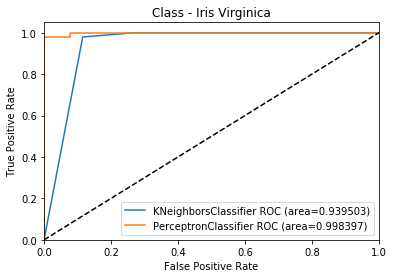

In [222]:

knc3=KNeighborsClassifier(n_neighbors=best_num)
probas_knc3=knc3.fit(X_train,Y_train_binar[:,2]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,2],probas_knc3[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,2])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,2])
probas_perc3=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,2],probas_perc3[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Virginica')
plt.show()

PR-кривые:

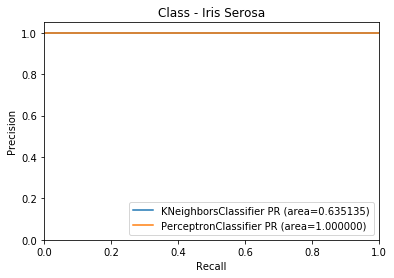

In [223]:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,0],probas_knc1[:,1])
aps_knc=average_precision_score(Y_test_binar[:,0],probas_knc1[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,0],probas_perc1[:,1])
aps_perc=average_precision_score(Y_test_binar[:,0],probas_perc1[:,1])
plt.plot(recall,precision,label='PerceptronClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Serosa')
plt.show()

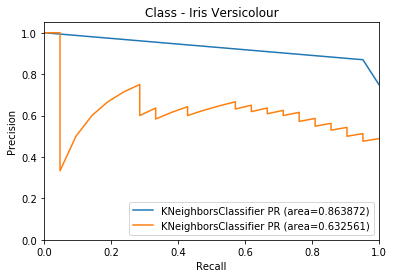

In [224]:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,1],probas_knc2[:,1])
aps_knc=average_precision_score(Y_test_binar[:,1],probas_knc2[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,1],probas_perc2[:,1])
aps_perc=average_precision_score(Y_test_binar[:,1],probas_perc2[:,1])
plt.plot(recall,precision,label='PerceptronClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Versicolour')
plt.show()

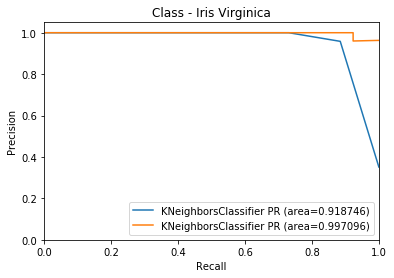

In [225]:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,2],probas_knc3[:,1])
aps_knc3=average_precision_score(Y_test_binar[:,2],probas_knc3[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc3)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,2],probas_perc3[:,1])
aps_perc=average_precision_score(Y_test_binar[:,2],probas_perc3[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Virginica')
plt.show()